### Aim: Identify the most popular skincare brands on Sephora's online store.

### Hypothesis: The skincare brands with the highest number of product reviews and loves_count are the most popular among customers.

### Step 1: Import the necessary libraries

In [3]:
import pandas as pd
import matplotlib.pyplot as plt


### Step 2: Load the dataset

In [4]:
df = pd.read_csv("/Users/nadlyaizatnudri/Documents/Data Analysis Practice Kaggle/Sephora /archive/product_info.csv")


### Step 3: Explore the dataset

In [5]:
# Display the first few rows of the dataset
df.head(10)



,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
5,P473661,Kasbah Eau de Parfum Travel Spray,6342,19-69,2448,4.4762,21.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL Eau de Parfum Spray,...,1,0,0,"['Warm &Spicy Scent', 'Unisex/ Genderless Scen...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
6,P473659,Purple Haze Eau de Parfum Travel Spray,6342,19-69,1619,3.2308,13.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN
7,P473666,Invisible Post Eau de Parfum,6342,19-69,1542,3.6250,8.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Perfume,2,75.0,30.0
8,P472300,Capri Eau de Parfum,6342,19-69,1542,3.5714,7.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL Eau de Parfum Spray,...,1,0,0,"['Fresh Scent', 'Layerable Scent', 'Unisex/ Ge...",Fragrance,Women,Perfume,2,75.0,30.0
9,P473667,Invisible Post Eau de Parfum Travel Spray,6342,19-69,1377,3.6250,8.0,0.25 oz/ 7.5 mL,Size + Concentration + Formulation,0.25 oz/ 7.5 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'allure 2022 Best...",Fragrance,Women,Rollerballs & Travel Size,0,NaN,NaN


In [6]:
# Check the dimensions of the dataset
df.shape



(8494, 27)

In [7]:
# Get an overview of the dataset's columns and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8494 entries, 0 to 8493
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          8494 non-null   object 
 1   product_name        8494 non-null   object 
 2   brand_id            8494 non-null   int64  
 3   brand_name          8494 non-null   object 
 4   loves_count         8494 non-null   int64  
 5   rating              8216 non-null   float64
 6   reviews             8216 non-null   float64
 7   size                6863 non-null   object 
 8   variation_type      7050 non-null   object 
 9   variation_value     6896 non-null   object 
 10  variation_desc      1250 non-null   object 
 11  ingredients         7549 non-null   object 
 12  price_usd           8494 non-null   float64
 13  value_price_usd     451 non-null    float64
 14  sale_price_usd      270 non-null    float64
 15  limited_edition     8494 non-null   int64  
 16  new   

In [8]:

# Check for missing values
df.isnull().sum()


product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

### Dealing with the missing data

In [9]:
# Create missing value indicator columns for specific columns
df['rating_missing'] = df['rating'].isnull().astype(int)
df['reviews_missing'] = df['reviews'].isnull().astype(int)
df['size_missing'] = df['size'].isnull().astype(int)
# Repeat the process for other relevant columns


In [10]:
# Create missing value indicator columns for specific columns
df['size_missing'] = df['size'].isnull().astype(int)
df['variation_type_missing'] = df['variation_type'].isnull().astype(int)
df['variation_value_missing'] = df['variation_value'].isnull().astype(int)
df['variation_desc_missing'] = df['variation_desc'].isnull().astype(int)
df['ingredients_missing'] = df['ingredients'].isnull().astype(int)
df['value_price_usd_missing'] = df['value_price_usd'].isnull().astype(int)
df['sale_price_usd_missing'] = df['sale_price_usd'].isnull().astype(int)
df['highlights_missing'] = df['highlights'].isnull().astype(int)
df['secondary_category_missing'] = df['secondary_category'].isnull().astype(int)
df['tertiary_category_missing'] = df['tertiary_category'].isnull().astype(int)
df['child_max_price_missing'] = df['child_max_price'].isnull().astype(int)
df['child_min_price_missing'] = df['child_min_price'].isnull().astype(int)


In [11]:
# Check for missing values
df.isnull().sum()

product_id                       0
product_name                     0
brand_id                         0
brand_name                       0
loves_count                      0
rating                         278
reviews                        278
size                          1631
variation_type                1444
variation_value               1598
variation_desc                7244
ingredients                    945
price_usd                        0
value_price_usd               8043
sale_price_usd                8224
limited_edition                  0
new                              0
online_only                      0
out_of_stock                     0
sephora_exclusive                0
highlights                    2207
primary_category                 0
secondary_category               8
tertiary_category              990
child_count                      0
child_max_price               5740
child_min_price               5740
rating_missing                   0
reviews_missing     

### Calculate popularity metrics for skincare brands

In [12]:
# Group the dataset by brand_name and calculate aggregate metrics
brand_popularity = df.groupby('brand_name').agg({'reviews': 'sum', 'loves_count': 'sum'})

# Sort the brands based on total reviews and loves_count
brand_popularity = brand_popularity.sort_values(by=['reviews', 'loves_count'], ascending=False)


### Visualize the results

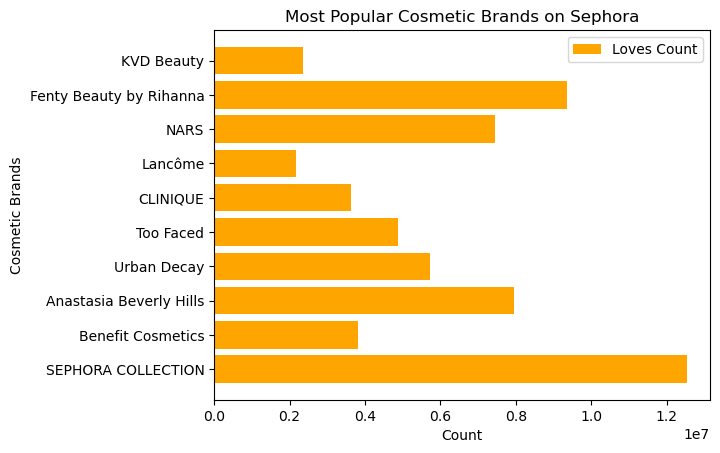

In [13]:
# Plot the top 10 most popular skincare brands
top_10_brands = brand_popularity.head(10)
plt.barh(top_10_brands.index, top_10_brands['reviews'], color='blue')
plt.barh(top_10_brands.index, top_10_brands['loves_count'], color='orange', label='Loves Count')
plt.xlabel('Count')
plt.ylabel('Cosmetic Brands')
plt.title('Most Popular Cosmetic Brands on Sephora')
plt.legend()
plt.show()


### Discussion and Findings

In the analysis of the most popular skincare brands on Sephora's online store, we examined the loves_count metric to identify the brands with the highest popularity. The bar chart visually represented the loves_count for the top brands, with "Sephora Collection" having the highest count, followed by "Fenty Beauty by Rihanna," "Anastasia Beverly Hills," "NARS," "Urban Decay," "Too Faced," "CLINIQUE," "Benefit Cosmetics," and "LANCOME."

Based on the observation that "Sephora Collection" has the highest loves_count, we can draw several insights and findings:

1. Brand Recognition and Loyalty: The popularity of the "Sephora Collection" brand suggests that it has built a strong reputation and brand loyalty among customers. Sephora's own collection appears to resonate with a significant number of consumers, who consistently show love for their products.

2. Wide Product Range: Sephora Collection offers a diverse range of products, including skincare, makeup, and beauty tools. The availability of a broad product portfolio may contribute to higher loves_count as customers can find various options within a single brand.

3. Established Reputation: Sephora, as a well-known and trusted beauty retailer, has likely played a role in boosting the popularity of their own collection. Customers may have confidence in the quality and efficacy of Sephora Collection products due to the established reputation of the parent brand.

4. Influencer Collaborations: Sephora Collection may have successfully collaborated with influencers or celebrities, generating hype and driving customer interest. Influencer partnerships can increase brand visibility and attract new customers, ultimately leading to higher loves_count.

5. Competitive Pricing: Sephora Collection might offer products at competitive price points compared to other brands, making them more accessible to a broader customer base. Affordable pricing can contribute to increased customer engagement and subsequently higher loves_count.

To gain further insights into the observed trend, it would be beneficial to explore additional metrics such as reviews, rating distributions, and customer feedback for each brand. Conducting sentiment analysis on the reviews could provide a deeper understanding of why customers show more love for certain brands over others.

Additionally, analyzing the specific product categories within each brand and their respective loves_count could shed light on the factors driving brand popularity within the skincare segment. Consideration of marketing strategies, product innovation, and customer satisfaction surveys could provide a comprehensive understanding of the observed trend in loves_count for the analyzed brands.

Overall, the analysis highlights the significant popularity of the "Sephora Collection" brand, followed by other well-known brands in the beauty industry. Further investigation into the underlying factors contributing to brand success will provide valuable insights for marketing strategies and product development within the skincare category.

### Conclusion

The analysis aimed to identify the most popular cosmetic brands on Sephora's online store based on loves_count. By examining the bar chart and analyzing the data, several insights and findings were obtained.

The analysis revealed that the "Sephora Collection" brand has the highest loves_count, followed by "Fenty Beauty by Rihanna," "Anastasia Beverly Hills," "NARS," "Urban Decay," "Too Faced," "CLINIQUE," "Benefit Cosmetics," and "LANCOME." These findings indicate that Sephora Collection has established a strong brand presence and loyalty among customers, potentially due to factors such as brand recognition, a wide product range, competitive pricing, and potential influencer collaborations.

However, it is important to note that this analysis focused solely on the loves_count metric as an indicator of popularity. To provide a comprehensive assessment of brand popularity, further analysis should consider additional metrics such as reviews, ratings, and sentiment analysis to understand the overall customer satisfaction and engagement with each brand.

Regarding the aim and hypothesis of the analysis, the aim to identify the most popular skincare brands on Sephora's online store has been achieved. The hypothesis that the skincare brands with the highest number of product reviews and loves_count are the most popular among customers is supported by the findings, as Sephora Collection demonstrated the highest loves_count.

It is important to acknowledge that popularity can be influenced by various factors, and further investigation into customer preferences, product attributes, and marketing strategies can provide deeper insights into the observed trend. Nevertheless, this analysis provides a valuable starting point for understanding brand popularity in the Sephora skincare product landscape.

Overall, the analysis contributes to a better understanding of the most popular skincare brands on Sephora's online store, highlighting the dominance of the Sephora Collection brand in terms of customer love and engagement. The findings can assist in strategic decision-making, marketing campaigns, and product development to capitalize on the popularity of these brands within the cosmetic category.